# TRABALHO INFERÊNCIA ESTATÍSTICA - ARTHUR MARTINS 

In [108]:
import numpy as np
from scipy.stats import binom, bernoulli, norm
import matplotlib.pyplot as plt

(a) A proporção de tentativas de relação bem sucedidas no trabalho de Sildenafil pode ser calculada para cada indivíduo e ser aproximada por uma distribuição Normal através do uso de que teorema da inferência estatística?

**Resposta:** Definamos $Xs_i$ a variável aleatória dada como sucesso para cada indivíduo que utilizou Sildenafil por pelo menos 4 semanas (como o artigo visto em sala sugere) e $Xp_i$ o sucesso para cada indivíduo sob efeito placebo, ou seja, as Variáveis Aleatórias que caracterizam os **dois** grupos de estudo.
Portanto, cada V.A. assume distribuição Binomial com parâmetros p (probabilidade de sucesso, onde sucesso $\equiv$ remédio funcionou $\equiv$ 1 na tabela) e parâmetros m = número de tentativas totais por indivíduo, dentre as quais se esperam x tentativas bem sucedidas.

$$ 
X_{s_i} \sim \text{Binomial}(m_s,p_s) 
$$

$$
X_{p_i} \sim \text{Binomial}(m_p,p_p)
$$

$$
f_X(x)=\binom{m}{x}p^x(1-p)^{m-x},  R_x=\{0,1,...,m\}
$$

Observe que para condução dos experimentos, supomos que cada observação é independente; ou seja, o efeito da consumação do remédio já se esgotou até sua próxima ingestão e respectiva tentativa do paciente observado.

Cada parâmetro $p_s$ e $p_p$ será estimado corretamente de acordo com as tabelas do artigo. Veja que no item b), proponho uma exemplificação genérica de como o experimento está organizado.

Também, vamos assumir que $m_s$ e $m_p$ são sempre fixos para todos indivíduos grupais. Ou seja, cada um dos n indivíduos, dos grupos 1 (Sildenafil) e grupos 2 (Placebo), tiveram, durante as 4 semanas de experimento, o mesmo número de tentativas $\Rightarrow$ $ms_1$ = $ms_2$ = ... = $ms_n$ e $mp_1$ = $mp_2$ = ... = $mp_n$. Tais simplificações serão úteis para aplicarmos o TLC, concluir resultados teóricos e supor normalidade assintótica na nossa distribuição da proporção para os grupos, pois assim, estaremos assumindo distribuições idênticas para cada $X_i$. 

O artigo também fornece que dos 3254 homens totais, 2123 consumiram sildenafil e 1131 "consumiram" o medicamento placebo.

Assim, a **proporção total de relações bem sucedidas no trabalho de Sildenafil pode ser aproximada por uma distribuição normal, pelo Teorema do Limite Central**, já que nosso número de observações por amostra (quantidade de homens participantes) é suficientemente grande

CÉLULA 1

Simulemos várias tentativas do uso dos remédios de cada paciente (por grupo). Observe que basicamente coletam-se os 2123 pacientes de Sildenafil e os 1131 pacientes de placebo.
Como o processo de gerar amostras aleatórias com distribuição requer fixar parâmetros; suponha que após estudos, concluiu-se o seguinte resultado por grupo:

**Grupo Sildenafil**
cada paciente tomou o remédio 8 vezes.
\
do total de tentativas bem sucedidas para cada pessoa, a proporção observada (p) foi de 65%.

**Grupo Placebo**
cada paciente tomou o remédio 10 vezes.
\
do total de tentativas bem sucedidas para cada pessoa, a proporção observada (p) foi de 30%.

In [474]:
# CÉLULA 1
np.random.seed(123)

m_s = 8
p_s = 0.65
obs_s = 1
N_s = 2123

pontos_amostrais_sildenafil = []

for _ in range(N_s):
    X_s = binom.rvs(m_s, p_s, size = obs_s)
    pontos_amostrais_sildenafil.extend(X_s)


m_p = 10
p_p = 0.3
obs_p = 1
N_p = 1131

pontos_amostrais_placebo = []

for _ in range(N_p):
    X_p = binom.rvs(m_p, p_p, size = obs_p)
    pontos_amostrais_placebo.extend(X_p)


print("número de tentativas bem sucedidas para os 5 primeiros pacientes de sildenafil",pontos_amostrais_sildenafil[0:5])
print("número de tentativas bem sucedidas para os 5 últimos pacientes de sildenafil",pontos_amostrais_sildenafil[-6:-1])
#type(pontos_amostrais_sildenafil)

print("número de tentativas bem sucedidas para os 5 primeiros pacientes de placebo", pontos_amostrais_placebo[0:5])
print("número de tentativas bem sucedidas para os 5 últimos pacientes de placebo",pontos_amostrais_placebo[-6:-1])
#type(pontos_amostrais_placebo)

print('e assim por diante...')

número de tentativas bem sucedidas para os 5 primeiros pacientes de sildenafil [5, 6, 6, 5, 4]
número de tentativas bem sucedidas para os 5 últimos pacientes de sildenafil [7, 4, 3, 5, 5]
número de tentativas bem sucedidas para os 5 primeiros pacientes de placebo [2, 2, 2, 7, 2]
número de tentativas bem sucedidas para os 5 últimos pacientes de placebo [6, 2, 3, 3, 4]
e assim por diante...


Nota-se que quanto menor o parâmetro populacional p, a distribuição torna-se assimétrica à esquerda. Enquanto que quando o parâmetro aproxima-se de 0.5, a distribuição torna-se simétrica em torno de p. Essas propriedades não necessariamente são genéricas de uma distribuição binomial com parâmetros p fixos como especificados acima e parâmetro m variando, mas acontecem no caso em que m = 10 e m = 8, como proposto no estudo.

Os plots abaixo da função massa de probabilidade para somente um paciente de cada grupo (uma única VA), por exemplo, explicitam quais são os números de tentativas bem sucedidas com maior probabilidade e menor probabilidade (repare que não necessariamente os valores mais esperados, já que para uma ${X} \sim {Bin}(m,p)$, $E[X] = mp $). 

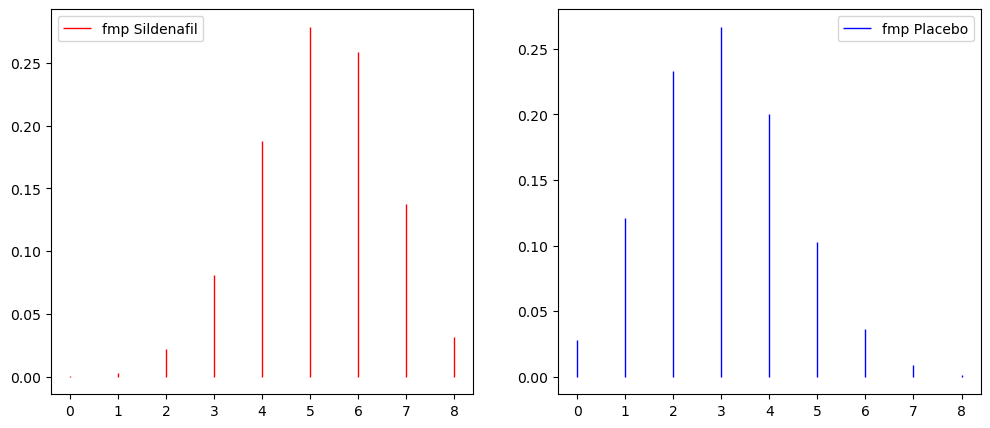

In [477]:
# PLOTANDO uma única fmp para uma pessoa de cada grupo:
fig, (fmp1, fmp2) = plt.subplots(1, 2, figsize = (12,5))

# fmp binomial sildenafil
rv1 = binom(m_s, p_s)

fmp1.vlines(x, 0, rv1.pmf(x), colors='red', linestyles='-', lw=1, label='fmp Sildenafil')
fmp1.legend(loc='upper left')

#fmp binomial placebo
rv2 = binom(m_p,p_p)

fmp2.vlines(x, 0, rv2.pmf(x), colors='blue', linestyles='-', lw=1, label='fmp Placebo')
fmp2.legend(loc='upper right')


plt.show()

A simulação abaixo confirma que o TLC pode ser aplicado para aproximar a distribuição binomial proposta no item (a), já que nosso número de pacientes é suficientemente grande. Repare que os histogramas montados para cada grupo de estudo assemelham-se a distribuições normais com os parâmetros especificados na legenda dos gráficos.

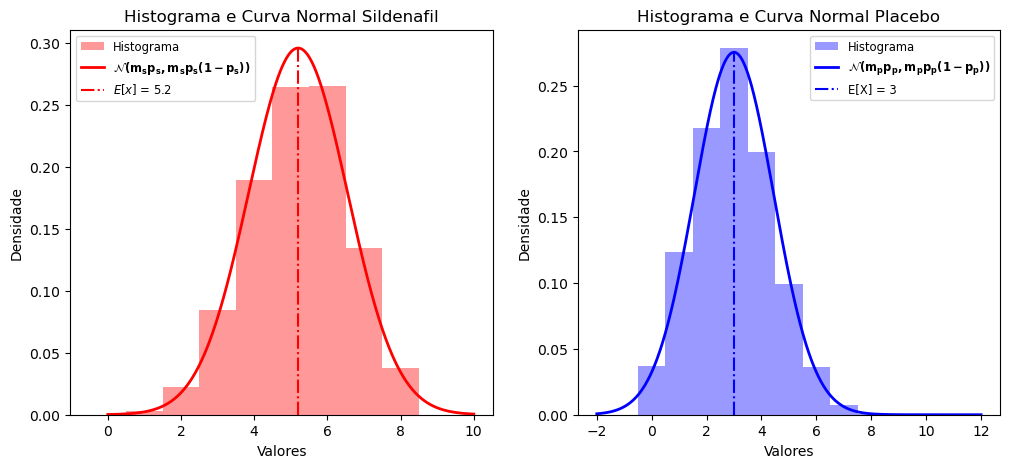

In [468]:
# aqui utilizemos de pontos_amostrais list para plotar os gráficos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# histograma primeiro subplot
ax1.hist(pontos_amostrais_sildenafil, bins=range(m_s+2), align = 'left', density=True, alpha=0.4, label='Histograma', color = 'red')

# Plot normal densidade primeiro subplot
x_values_1 = np.linspace(0, m_s+2, 1000)  # Range of x 
normal_distribution = norm(loc=m_s * p_s, scale=np.sqrt(m_s * p_s * (1 - p_s)))  
ax1.plot(x_values_1, normal_distribution.pdf(x_values_1), color='red', linewidth=2, label=r'$\mathbf{\mathcal{N}(m_sp_s, m_sp_s(1-p_s))}$')

# nomencalturas 1
ax1.set_xlabel('Valores')
ax1.set_ylabel('Densidade')
ax1.set_title('Histograma e Curva Normal Sildenafil')
ax1.axvline(5.2, color = 'red', ymax = 0.95, label = '$E[x]$ = 5.2', linestyle = '-.')
ax1.legend(loc = 'upper left', fontsize = 'small')


# histograma segundo subplot
ax2.hist(pontos_amostrais_placebo, bins=range(m_p+2), align = 'left', density=True, alpha=0.4, label='Histograma', color = 'blue')

# Plot normal densidade segundo subplot
x_values_2 = np.linspace(-2, m_p+2, 1000)  # Range of x 
normal_distribution = norm(loc=m_p * p_p, scale=np.sqrt(m_p * p_p * (1 - p_p)))  
ax2.plot(x_values_2, normal_distribution.pdf(x_values_2), color='blue', linewidth=2, label=r'$\mathbf{\mathcal{N}(m_pp_p, m_pp_p(1-p_p))}$')

# nomencalturas 2
ax2.set_xlabel('Valores')
ax2.set_ylabel('Densidade')
ax2.set_title('Histograma e Curva Normal Placebo')
ax2.axvline(3, color = 'blue', ymax = 0.945, label = 'E[X] = 3', linestyle = '-.')
ax2.legend(loc = 'upper right', fontsize = 'small')


plt.show()

Observe que cada vez que a célula de código 1 é rodada, obtemos uma nova simetria e forma de histograma e função densidade para cada grupo de estudo, já que a função da célula 1 é gerar valores randômicos para cada variável aleatória de estudo toda vez que ela é rodada.

(b) Defina uma notação para formalizar a proporção observada em cada indivíduo, o estimador de interesse e a distribuição assintótica desse estimador (com respectivos parâmetros), sob as condições do teorema. Lembre que o projeto tem dois grupos de estudo e pense na correta especificação envolvendo esses grupos.

\
Suponhamos que o experimento fora organizado da seguinte maneira:

Para cada paciente, de cada grupo, organizaram-se as tentativas. Assim, uma tentativa falha equivale a 0, enquanto uma tentativa sucedida equivale a 1. Veja na tabela artificial abaixo, por exemplo. Note que o número de tentativas por pessoa, durante as 4 semanas, não é igual. Para fins teóricos, como comentado no item (a), estabeleci que todas pessoas do grupo Sildenafil realizaram o mesmo número de tentativas durante o período de estudo e todas do grupo Placebo tiveram o mesmo número de tentativas, também, pois isso facilita simulações. Veja que para um estudo mais preciso, poderíamos agrupar os pacientes de cada grupo por número de tentativas (100 pacientes tentaram 6 vezes, 20 tentaram 10 vezes, 80 tentaram 5, e assim por diante), poderíamos introduzir a variável tempo e usar outra distribuição, etc.

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Paciente 1} & \textbf{Paciente 2} & \textbf{Paciente 3} \\
\hline
1 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 0\\
0 & 1 & 1\\
1 &   & 1\\
1 &   & \\
1 &   & \\
\hline
\end{array}
$$

Os nossos estimadores de interesse são $p_s$ e $p_p$ (justamente as proporções) e podem ser encontrados a partir do método de máxima verossimilhança aplicado às distribuições binomiais do item (a), onde *$\theta$* = (m,p) é vetor.

$$
L{(\theta, x_i)} = \prod_{i=1}^{n} \binom{m}{x_i} p^x_i (1-p)^{m-x_i}  
$$

$$
\Leftrightarrow
$$

$$
\ln{L{(\theta, x_i)}} = l{(\theta)} = \sum_{i=1}^{n} \ln{\binom{m}{x_i}} + \ln{p} \sum_{i=1}^{n} x_i + \ln{(1-p)}(mn - \sum_{i=1}^{n} x_i)
$$

O estimador de maximaverossimilhança de p, nossa proporção, é dado por $\hat{p}$ e encontrado ${\hat{p}}=\underset{\theta \in \Theta}{\arg \max } \mathcal{L}\left(\theta, x_i\right)$, ou seja, derivando-se $l{(\theta)}$ e igualando a derivada a zero:

$$
\frac{\partial l{(\theta)}}{\partial p} = 0 \Rightarrow
$$

$$
\frac{\sum_{i=1}^{n} x_i}{\hat{p}} = \frac{mn - \sum_{i=1}^{n} x_i}{1-\hat{p}} \Leftrightarrow
$$

$$
\hat{p} = \frac{\sum_{i=1}^{n} x_i}{mn} = \frac{\bar{X}}{m}
$$

Assim, a proporção pedida no enunciado é $\hat{p}$, como encontrado acima. Formalizando a proporção para o grupo de sildenafil e placebo, respectivamente, podemos aproximar assintoticamente a distribuição de $\hat{p}$, utilizando o seguinte teorema:

$$
\sqrt{n}(\hat{p} - p) \overset{a}{\sim} {N}(0,\frac{1}{I_{f1}(p)})
$$

$$
{I_{f1}(p)} = - E[\frac{\partial^2 l{(x_1,\theta)}}{\partial p^2}] = - E[\frac{\partial^2 \ln{\binom{m}{x_1}} + x_1\ln{p} + (m-x_1)\ln{(1-p)}}{\partial p^2}] \Leftrightarrow
$$

$$
{I_{f1}(p)} = \frac{E[x_1]}{p^2} - \frac{E[x_1]}{(1-p^2)} + \frac{m}{(1-p)^2} \Leftrightarrow 
$$

$$
{I_{f1}(p)} = \frac{mp}{p^2}-\frac{mp}{(1-p)^2}+\frac{m}{(1-p)^2} \Leftrightarrow 
$$

$$
{I_{f1}(p)} = \frac{m}{p(1-p)}
$$

Portanto, 

$$
\frac{1}{{I_{f1}(p)}} = \frac{p(1-p)}{m}
$$

Logo, para os grupos de Sildenafil e placebo, respectivamente, as proporções (estimadores) têm distribuições assintóticas:

$$
\frac{\bar{X_{s}}}{m_s} \overset{a}{\sim} {Normal}(0,\frac{p_s(1-p_s)}{m_s})
$$

$$
\frac{\bar{X_{p}}}{m_p} \overset{a}{\sim} {Normal}(0,\frac{p_p(1-p_p)}{m_p})
$$

Simulando distribuições assintóticas de 

$$\frac{\bar{X}}{m}$$

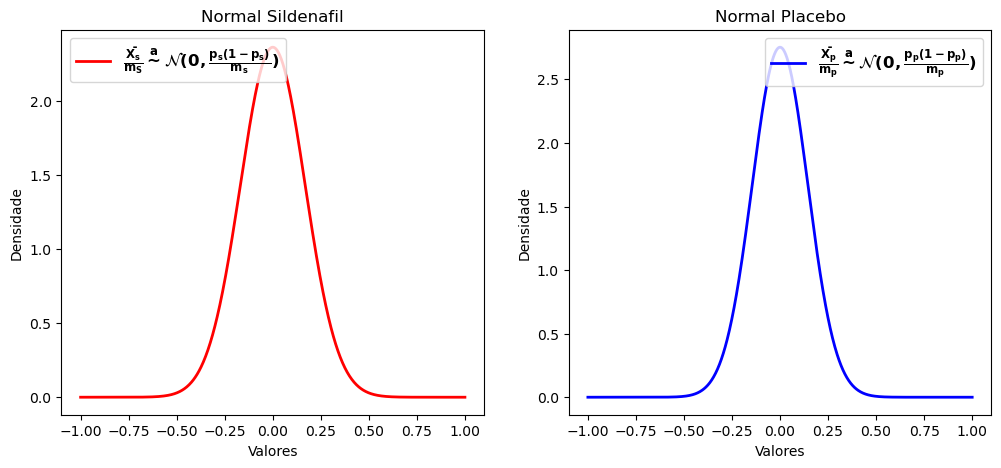

In [469]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

# Plot normal densidade terceiro subplot
x_values_3 = np.linspace(-1, 1, 1000)
normal_distribution_3 = norm(loc=0, scale=np.sqrt(p_s * (1 - p_s) / m_s))
ax3.plot(x_values_3, normal_distribution_3.pdf(x_values_3), color='red', linewidth=2, 
         label=r'$\mathbf{\frac{\bar{X_s}}{m_S} \overset{a}{\sim} \mathcal{N}(0, \frac{p_s(1-p_s)}{m_s})}$')

# nomenclaturas 
ax3.set_xlabel('Valores')
ax3.set_ylabel('Densidade')
ax3.set_title('Normal Sildenafil')
ax3.legend(loc = 'upper left', fontsize  = 'large')

# Plot normal densidade quarto subplot
x_values_4 = np.linspace(-1, 1, 1000)
normal_distribution_4 = norm(loc=0, scale=np.sqrt(p_p * (1 - p_p) / m_p))
ax4.plot(x_values_4, normal_distribution_4.pdf(x_values_3), color='blue', linewidth=2, 
         label=r'$\mathbf{\frac{\bar{X_p}}{m_p} \overset{a}{\sim} \mathcal{N}(0, \frac{p_p(1-p_p)}{m_p})}$')

# nomenclaturas 
ax4.set_xlabel('Valores')
ax4.set_ylabel('Densidade')
ax4.set_title('Normal Placebo')
ax4.legend(loc = 'upper right', fontsize = 'large')


plt.show()

c) Por outro lado, suponha que proporção de tentativas bem sucedidas siga uma distribuição Normal, com parâmetros diferentes em cada grupo. Quais são os EMV dos parâmetros de interesse e respectiva distribuição assintótica?

Nessa questão, estamos assumindo, necessariamente, que as proporções de tentativas bem sucedidas, dos grupos Sildenafil e Placebo, respectivamente, são Normais. Isto é:

**1)**
$$
\frac{\bar{X_{s}}}{m_s} \sim {Normal}(\mu_s,\sigma^2_s)
$$

**2)**

$$
\frac{\bar{X_{p}}}{m_p} \sim {Normal}(\mu_p,\sigma^2_p)
$$

Sabemos, pelo método de máxima-verossimilhança que o EMV($\mu$) = $\hat{\mu}$ = $\frac{\sum_{i=1}^{n} x_i}{n}$ = $\bar{X}$ e EMV($\sigma^2$) = $\hat{\sigma^2}$ = $\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$ (note que $\hat{\sigma^2}$ é estimador viciado de $\sigma^2$).

Logo, como a V.A. $\frac{\bar{X}}{m}$ é assumida exatamente normal, e $\bar{X}$ é estimador de $\mu$, então $\bar{X}$ tem distribuição exata (e consequentemente também assintótica) dada por:

$$
\bar{X} \sim {Normal}(\mu,\frac{\sigma^2}{n})
$$

Para se obter a distribuição assintótica (e repare que não exata) de $\hat{\sigma^2}$, é uma tarefa árdua, então, podemos obter a distribuição exata de $\frac{(n-1){S^2}}{\sigma^2}$ $\sim$ $𝜒^{2}_{(n-1)}$, onde ${S^2}$ = $\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}$ (variância amostral) é estimador não viciado de $\sigma^2$

Portanto,

$$
\hat{\mu}_{sildenafil} \sim {Normal}(\mu_s,\frac{\sigma^2_s}{n})
$$

$$
\hat{\mu}_{placebo} \sim {Normal}(\mu_p,\frac{\sigma^2_p}{n})
$$

e também temos que:


$$
\frac{(n-1){S^2}_{sildenafil}}{\sigma^2_{sildenafil}} \sim 𝜒^{2}_{(n_{s}-1)}
$$

$$
\frac{(n-1){S^2}_{placebo}}{\sigma^2_{placebo}} \sim 𝜒^{2}_{(n_{p}-1)}
$$

(d) Quais as propriedades desses estimadores? São propriedades assintóticas ou exatas?

Depende. Caso estejamos falando do item (b), como aproximamos a distribuição da nossa proporção ($\frac{\bar{X}}{m}$) assintoticamente via uma normal, a partir do teorema enunciado no próprio item, as propriedades do estimador, como consistência, vício e EQM seriam assintóticas. Assim, um número suficientemente grande de amostras, como o número de homens no experimento, poderia garantir boas propriedades assintóticas para os estimadores propostos. Pode-se conferir tais propriedades a partir de simulações

Agora, tratando do item (c), ambas distribuições encontradas para os estimadores $\hat{\mu}$ e $\hat{\sigma^2}$ são exatas, e não aproximadas; já que o enunciado sugere suposição de que o estimador da proporção, nosso $\hat{p}$ = $\frac{\bar{X}}{m}$, assume distribuição Normal. Então, a partir da construção feita acima no item (c), obtivemos propriedades exatas.

(e) Faça um estudo de simulação, análogo ao realizado no exercício 8 da na prova 1, porém considerando a distribuição Normal ao invés da Beta. Especifique quais parâmetros você fixou para a simulação e justifique sua escolha.

**Resposta**: Para esse exercício, irei utilizar as distribuições Normais encontradas no item(a), já que o enunciado deixa livre escolha. A escolha dos parâmetros já foi justificada no item (a), então só realizo uma rápido resumo a seguir.

Sabemos que a distribuição $\mathcal{N}(\mu,\sigma^2)$ tem forma fechada para seus estimadores não viciados de máxima verossimilhança, o que dispensa métodos numéricos como Newton-Raphson:

$$
\hat{\mu} = \frac{\sum_{i=1}^{n} x_i}{n} = \bar{X}
$$

$$
\hat{\sigma^2} = {S^2} = \frac{ \sum_{i=1}^{n}(x_i - \bar{x})^2 }{n-1}
$$


Para as distribuições normais que simulamos no item (a), $\mathcal{N}(m_sp_s, m_sp_s(1-p_s))$ e $\mathcal{N}(m_pp_p, m_pp_p(1-p_p))$, podemos calcular valores estimados (amostrais) $\hat{\mu}$ e $\hat{\sigma^2}$ e os valores teóricos (populacionais) $\mu$ e $\sigma^2$.

Comecemos pelos valores teóricos, supondo que nossa distribuição para o grupo sildenafil, após fixarmos aqueles valores para $m_s$ e $p_s$ no começo do item (a), seja a seguinte:

$$
\mathcal{N}(m_sp_s, m_sp_s(1-p_s) \Rightarrow
$$

$$
\mathcal{N}(8 * 0.65, 8 * 0.65 * (1-0.65)) \Leftrightarrow
$$

$$
\mathcal{N}(5.2, 1.82)
$$

Analogamente para o grupo Placebo:

$$
\mathcal{N}(10 * 0.3, 10 * 0.3 * (1-0.3)) \Leftrightarrow
$$

$$
\mathcal{N}(3,2.1)
$$

Portanto, conclui-se facilmente que os valores teóricos e populacionais (e veja que assintóticos também, já que aproximamos uma binomial por uma Normal) são:

$$
\mu_{sildenafil} = 5.2 
$$
$$
\sigma^2_{sildenafil} = 1.82
$$

e

$$
\mu_{placebo} = 3 
$$
$$
\sigma^2_{placebo} = 2.1 
$$

Agora partindo para os valores estimados (amostrais), usemos as simulações do item (a)

Os comandos abaixo já usam as fórmulas dos estimadores não viciados, como é proposto por $\bar{X}$ e ${S^2}$ 

In [473]:
media_sildenafil = np.mean(pontos_amostrais_sildenafil)
print(f'mu_estimador_sildenafil = {media_sildenafil}')

var_sildenafil = np.var(pontos_amostrais_sildenafil, ddof  = 1)
print(f'sigma^2_estimador_sildenafil = {var_sildenafil}')


media_placebo = np.mean(pontos_amostrais_placebo)
print(f'mu_estimador_placebo = {media_placebo}')

var_placebo = np.var(pontos_amostrais_placebo, ddof = 1)
print(f'sigma^2_estimador_placebo = {var_placebo}')

mu_estimador_sildenafil = 5.208666980687706
sigma^2_estimador_sildenafil = 1.8767957245783913
mu_estimador_placebo = 2.962864721485411
sigma^2_estimador_placebo = 2.1048144409755642


Nossos resultados são:

$$
\hat{\mu}_{sildenafil} = 5.208666980687706, 
$$
$$
\hat{\sigma^2}_{sildenafil} = 1.8767957245783913
$$

e

$$
\hat{\mu}_{placebo} = 2.962864721485411, 
$$
$$
\hat{\sigma^2}_{placebo} = 2.1048144409755642
$$

Podemos perceber que eles são muito próximos dos valores teóricos relatados, já que o alto número de pacientes em estudo fornece uma boa aproximação assintótica para média e variância de Normais

Agora, iremos para os cálculos dos Vícios e Erros Quadráticos médios para estimadores. Note que os valores também serão assintóticos, já que usamos o TLC.

Primeiro, comecemos com os valores amostrais teóricos e logo em seguida vamos simular:
\
Para um estimador qualquer $\theta$:
$$
\mathcal{B}_{\theta}(\hat{\theta}) = E[\hat{\theta}] - {\theta}
$$
\
$$
\mathcal{B}_{\mu}(\hat{\mu}_{sildenafil}) = 5.2 - 5.2 = 0
$$
$$
\mathcal{B}_{\sigma^2}(\hat{\sigma^2}_{sildenafil}) = E[\hat\sigma^2_{sildenafil}] - \sigma^2_{sildenafil} = E[{S^2}_{sildenafil}] - \sigma^2_{sildenafil} = 0
$$

De maneira análoga, 

$$
\mathcal{B}_{\mu}(\hat{\mu}_{placebo}) = 0
$$
$$
\mathcal{B}_{\sigma^2}(\hat{\sigma^2}_{placebo}) = 0
$$

Os resultados teóricos nulos são totalmente esperados, já que os estimadores são **não viciados**

\
$$
EQM[\hat{\theta}] = {E}[(\hat{\theta} - \theta)^2] = Var(\hat\theta) + \mathcal{B}^2_{\theta}(\hat\theta)
$$


como os estimadores são não viciados, então:

$$
EQM[\hat{\theta}] = Var(\hat\theta)
$$

$$
EQM[\hat{\mu}_{sildenafil}] = Var(\bar{X}_{sildenafil}) = \frac{\sigma^2_{sildenafil}}{n} = \frac{1.82}{2123} \approx 0.0008572774
$$

$$
EQM[\hat{\sigma^2}_{sildenafil}] = Var({S^2}_{sildenafil}) = \frac{2(\sigma^2_{sildenafil})^2}{n-1} = \frac{2*(1.82)^2}{2123-1} \approx 0.00312196
$$


A relação do EQM para ${S^2}$ é facilmente obtida notando-se que se Y = $\frac{(n-1){S^2}}{\sigma^2}$ $\sim$ $\mathcal{\chi}^{2}_{(n-1)}$, $Var(Y)$ = $2(n-1)$ $\Rightarrow$ $Var({S^2}) = \frac{2(\sigma^2)^2}{n-1}$


De maneira análoga ao grupo placebo, temos o resultado teórico:

$$
EQM[\hat{\mu}_{placebo}] = \frac{2.1}{1131} \approx 0.00185676
$$

$$
EQM[{S^2}_{placebo} = \frac{2*(2.1)^2}{1131-1} \approx 0.00780531
$$

In [480]:
bias_mu_sildenafil = media_sildenafil - 5.2
eqm_mu_sildenafil = np.mean( (media_sildenafil - 5.2)**2 )

bias_S_sildenafil = np.mean(var_sildenafil) - 1.82
eqm_S_sildenafil = np.mean( (var_sildenafil - 1.82)**2 )

print("vicio mu sildenafil",bias_mu_sildenafil)
print("vicio S sildenafil",bias_S_sildenafil)
print("EQM mu sildenafil",eqm_mu_sildenafil)
print("EQM S sildenafil",eqm_S_sildenafil, '\n')

bias_mu_placebo = media_placebo - 3
eqm_mu_placebo = np.mean( (media_placebo - 3)**2 )

bias_S_placebo = np.mean(var_placebo) - 2.1
eqm_S_placebo = np.mean( (var_placebo - 2.1)**2 )

print("vicio mu placebo",bias_mu_placebo)
print("vicio S placebo",bias_S_placebo)
print("EQM mu placebo",eqm_mu_placebo)
print("EQM S placebo",eqm_S_placebo)

vicio mu sildenafil 0.008666980687705994
vicio S sildenafil 0.056795724578391216
EQM mu sildenafil 7.511655424106867e-05
EQM S sildenafil 0.003225754330384472 

vicio mu placebo -0.037135278514588865
vicio S placebo 0.00481444097556416
EQM mu placebo 0.0013790289103560855
EQM S placebo 2.3178841907191183e-05
